<a href="https://colab.research.google.com/github/1jgvc/pandas-dataset-analisis/blob/main/pandas_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
#importamos librerias que se utilizaran
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import locale
import datetime

locale.setlocale(locale.LC_ALL, '')
pd.options.mode.chained_assignment = None  # default='warn'


In [185]:
locale.LC_ALL

6

In [130]:
"""
Seleccionamos un dataset del catalogo
http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html

En este caso es el de urgencias en su ultima vesion hasta el momento
http://www.dgis.salud.gob.mx/descargas/datosabiertos/urgencias/Urgencias_2024.zip?v=2024.04.05
"""

%pwd
#asiganoms un nombre de salida para evitar contratiempos (tiene extencion zip!!)
urgencias_dir='urgencias-salud-data/'
data_file='urgencias-dataset-current.zip'
complete_path=urgencias_dir+data_file
%mkdir urgencias-salud-data
!wget -O $complete_path http://www.dgis.salud.gob.mx/descargas/datosabiertos/urgencias/Urgencias_2024.zip?v=2024.04.05


mkdir: cannot create directory ‘urgencias-salud-data’: File exists
--2024-06-09 01:11:20--  http://www.dgis.salud.gob.mx/descargas/datosabiertos/urgencias/Urgencias_2024.zip?v=2024.04.05
Resolving www.dgis.salud.gob.mx (www.dgis.salud.gob.mx)... 201.98.60.128
Connecting to www.dgis.salud.gob.mx (www.dgis.salud.gob.mx)|201.98.60.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46163532 (44M) [application/zip]
Saving to: ‘urgencias-salud-data/urgencias-dataset-current.zip’

urgencias-salud-dat 100%[===================>]  44.02M  13.6MB/s    in 4.0s    

2024-06-09 01:11:24 (11.1 MB/s) - ‘urgencias-salud-data/urgencias-dataset-current.zip’ saved [46163532/46163532]



In [133]:
#Descomprimimos el archivo
!unzip -o $complete_path -d $urgencias_dir

Archive:  urgencias-salud-data/urgencias-dataset-current.zip
  inflating: urgencias-salud-data/Registros/Afecciones.txt  
  inflating: urgencias-salud-data/Registros/Medicamentos.txt  
  inflating: urgencias-salud-data/Registros/Procedimientos.txt  
  inflating: urgencias-salud-data/Registros/Urgencias.txt  


In [165]:
#convertimos el dataset en pandaDataFrame
emergencies_file=urgencias_dir+"Registros/Urgencias.txt"
df_emergencies=pd.read_csv(emergencies_file, delimiter='|',engine='python')
#df_emergencies.head(5)

In [224]:
#Del catalogo Descriptores_Base_de_Datos_URGENCIAS_2008_2016 obtenemos el ID de Sonora=26
df_emergencies_sonoraRaw=df_emergencies.loc[df_emergencies['ENTRESIDENCIA']==26]
df_emergencies_sonora=df_emergencies_sonoraRaw.dropna()

df_emergencies_sonora['fechaingreso'] = pd.to_datetime(df_emergencies_sonora['fechaingreso']+'|'+df_emergencies_sonora['hora_ingreso'], format='%Y-%m-%d|%H:%M')
df_emergencies_sonora.head(5)


,ID,CLUES,fechaalta,EDAD,CVEEDAD,SEXO,ENTRESIDENCIA,MUNRESIDENCIA,DERHAB,TIPOURGENCIA,...,AFECPRIN,IRA,PLANEDA,SOBRESEDA,fechaingreso,HORASESTANCIA,MES_ESTADISTICO,hora_ingreso,hora_alta,Fecha_Corte
19522,19523,MCSSA001011,2024-02-06,30,5,2,26,42,0,2,...,S822,8,8,0,2024-02-06 14:30:00,000:30,2,14:30,15:00,2024-04-02
50528,50529,MCSSA002184,2024-02-08,84,5,2,26,33,0,1,...,E119,8,8,0,2024-02-08 00:15:00,001:26,2,00:15,01:41,2024-04-02
72641,72642,MCSSA010222,2024-02-24,29,5,1,26,21,0,1,...,E872,8,8,0,2024-02-24 06:01:00,013:14,2,06:01,19:15,2024-04-02
88353,88354,MCSSA010222,2024-02-27,64,5,1,26,30,0,2,...,G589,8,8,0,2024-02-27 10:49:00,000:31,2,10:49,11:20,2024-04-02
269854,269855,SRSSA001851,2024-01-24,50,5,2,26,43,1,2,...,I10X,8,8,0,2024-01-24 13:23:00,000:10,1,13:23,13:33,2024-04-02


In [82]:
#Obtenemos el catalogo de municipios para utilizarlo en nuestro conjunto de datos y mostrar el nombre
catalog_city=urgencias_dir+"municipios.xlsx"
!wget -O $catalog_city http://gobi.salud.gob.mx/gobi/catalogos/catalogosmaestros/MUNICIPIOS_202404.xlsx?v=2024.05.15


--2024-06-09 00:14:14--  http://gobi.salud.gob.mx/gobi/catalogos/catalogosmaestros/MUNICIPIOS_202404.xlsx?v=2024.05.15
Resolving gobi.salud.gob.mx (gobi.salud.gob.mx)... 187.218.18.225
Connecting to gobi.salud.gob.mx (gobi.salud.gob.mx)|187.218.18.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72333 (71K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘urgencias-salud-data/municipios.xlsx’

urgencias-salud-dat 100%[===================>]  70.64K   206KB/s    in 0.3s    

2024-06-09 00:14:15 (206 KB/s) - ‘urgencias-salud-data/municipios.xlsx’ saved [72333/72333]



In [225]:
#Convertimos los municipios en un pandaDataFrame, en este caso es un archivo xlsx
df_cities = pd.read_excel(urgencias_dir+'municipios.xlsx')
df_cities = df_cities[df_cities['EFE_KEY']==26]
df_cities.rename(columns={"CATALOG_KEY": "MUNRESIDENCIA"}, errors="raise", inplace = True)
df_cities.head(5)
#df_cities.info()

,EFE_KEY,MUNRESIDENCIA,MUNICIPIO
1908,26,1,ACONCHI
1909,26,2,AGUA PRIETA
1910,26,3,ALAMOS
1911,26,4,ALTAR
1912,26,5,ARIVECHI


In [226]:
#Unimos nuestos dos conjuntos de datos pandaDataFrame
df_emergencies_labeled =pd.merge(df_emergencies_sonora,df_cities, on='MUNRESIDENCIA', how='outer')
df_emergencies_labeled.head(5)


,ID,CLUES,fechaalta,EDAD,CVEEDAD,SEXO,ENTRESIDENCIA,MUNRESIDENCIA,DERHAB,TIPOURGENCIA,...,PLANEDA,SOBRESEDA,fechaingreso,HORASESTANCIA,MES_ESTADISTICO,hora_ingreso,hora_alta,Fecha_Corte,EFE_KEY,MUNICIPIO
0,19523.0,MCSSA001011,2024-02-06,30.0,5.0,2.0,26.0,42,0.0,2.0,...,8,0.0,2024-02-06 14:30:00,000:30,2.0,14:30,15:00,2024-04-02,26.0,NAVOJOA
1,269859.0,SRSSA001670,2024-01-11,51.0,5.0,2.0,26.0,42,10.0,1.0,...,8,0.0,2024-01-11 14:50:00,000:19,1.0,14:50,15:09,2024-04-02,26.0,NAVOJOA
2,269865.0,SRSSA001670,2024-01-11,48.0,5.0,2.0,26.0,42,10.0,1.0,...,8,0.0,2024-01-11 17:00:00,000:35,1.0,17:00,17:35,2024-04-02,26.0,NAVOJOA
3,269867.0,SRSSA001670,2024-01-11,31.0,5.0,2.0,26.0,42,10.0,1.0,...,8,0.0,2024-01-11 19:40:00,000:21,1.0,19:40,20:01,2024-04-02,26.0,NAVOJOA
4,269874.0,SRSSA001670,2024-01-17,12.0,5.0,2.0,26.0,42,10.0,1.0,...,8,0.0,2024-01-17 13:00:00,000:39,1.0,13:00,13:39,2024-04-02,26.0,NAVOJOA


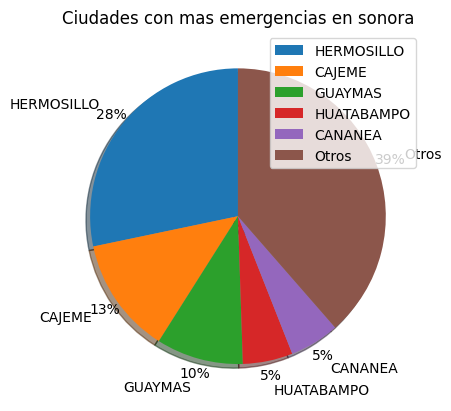

In [227]:
#Agrupamos por municipio, obtenemos los porcentajes de emergencias para todos y agrupamos los primeros cinco y todos los demas en otro calculo
total_emergencies=len(df_emergencies_labeled.index)

"""
df_emergencies_labeled.groupby('fechaingreso').agg(
    count=pd.NamedAgg(column='MUNRESIDENCIA', aggfunc='count'),
    )
"""

dt_countByCity=df_emergencies_labeled.groupby('MUNICIPIO').agg(
    count=pd.NamedAgg(column='MUNRESIDENCIA', aggfunc='count'),
    )
dt_countByCity['percent'] = dt_countByCity.groupby(['MUNICIPIO'])['count'].transform(lambda x: x/total_emergencies)
dt_sortedCity=dt_countByCity.sort_values(by=['count'], ascending=False)
dt_top5=dt_sortedCity.head(5)
dt_allOthers=dt_sortedCity.tail(len(dt_sortedCity)-5)

allOthersCount=dt_allOthers['count'].sum()
allOthersPercent=allOthersCount/total_emergencies

dt_top5.loc['Otros'] = [allOthersCount, allOthersPercent]
plotTop5 = dt_top5.plot(kind='pie',y='percent', title="Ciudades con mas emergencias en sonora", label='',autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2,shadow=True, startangle=90)

#plotDays = dt_byDayOfWeek.plot(kind='pie',y='percent', title="Dias con mas accidentes", label='',autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2,shadow=True, startangle=90)
#dt_byDayOfWeek

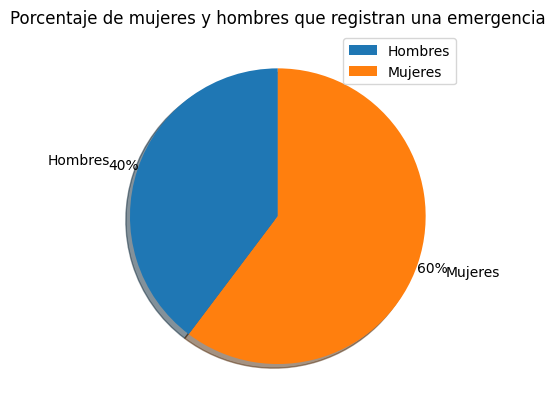

In [289]:
#Calculamos las emergencias por hombre y mujer
df_bySex = df_emergencies_labeled[df_emergencies_labeled['SEXO'].isin([1,2])]
df_bySexLabel=df_bySex[[ 'SEXO','MUNICIPIO']]
total_people=len(df_bySex.index)
df_bySexLabel.loc[df_bySexLabel.SEXO == 2.0, 'SEXO'] = 'Mujeres'
df_bySexLabel.loc[df_bySexLabel.SEXO == 1.0, 'SEXO'] = 'Hombres'

df_bySex=df_bySexLabel.groupby('SEXO').agg(
    count=pd.NamedAgg(column='SEXO', aggfunc='count'),
    )

df_bySex['percent'] = df_bySex.groupby(['SEXO'])['count'].transform(lambda x: x/total_people)
plotbYsEX = df_bySex.plot(kind='pie',y='percent', title="Porcentaje de mujeres y hombres que registran una emergencia", label='',autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2,shadow=True, startangle=90)



In [ ]:
#Mas de la mitad de las emerjencias son de mujeres, esto podria explicarse por complicaciones de un embarazo?
#para ello se tendria que analizar  el campo AFECPRIN uniendolo con Descriptores_Base_de_Datos_URGENCIAS_2008_2016

#Hermosillo concentra una gran cantidad de emergencias seria interesante comparar contra el numero total de habitantes...

In [245]:
#Las ultimas 10 emergencias registradas ocurrieron en:
dt_sortedDate=df_emergencies_labeled.sort_values(by=['fechaingreso'], ascending=False)
dt_sortedDate=dt_sortedDate[['fechaingreso','MUNICIPIO']]
dt_sortedDate.head(10)


,fechaingreso,MUNICIPIO
29158,2024-04-01 01:40:00,ALAMOS
2954,2024-03-31 23:30:00,HUATABAMPO
30240,2024-03-31 22:56:00,IMURIS
28686,2024-03-31 21:56:00,MAGDALENA
28685,2024-03-31 20:40:00,MAGDALENA
28695,2024-03-31 18:15:00,MAGDALENA
28697,2024-03-31 18:00:00,MAGDALENA
12637,2024-03-31 18:00:00,HERMOSILLO
28699,2024-03-31 17:40:00,MAGDALENA
28702,2024-03-31 17:30:00,MAGDALENA
